In [1]:
import pandas as pd 
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import re 

In [21]:
#nltk.download() if you have done this before skip this part 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
mails = pd.read_csv('spam.csv')

In [3]:
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
mails = mails.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
mails.columns = ['spam_or_not','Mails']

In [6]:
spam=pd.get_dummies(mails['spam_or_not'])
spam.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
mails['spam']=spam.spam
mails=mails.drop(['spam_or_not'],axis=1)

In [8]:
mails.head()

,Mails,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
mails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mails   5572 non-null   object
 1   spam    5572 non-null   uint8 
dtypes: object(1), uint8(1)
memory usage: 49.1+ KB


In [10]:
stemming=PorterStemmer()#stemming process(similar to base words) 

In [11]:
filtered_mails=[]
for i in range(len(mails)):
    sentence_preprocessing = re.sub('[^a-zA-z]',' ',mails.Mails[i])
    sentence_preprocessing = sentence_preprocessing.lower()
    sentence_preprocessing = sentence_preprocessing.split()

    sec_processed=[]
    for word in sentence_preprocessing:
        if word not in stopwords.words('english'): # to remove puntuations 
            stem_word=stemming.stem(word)
            sec_processed.append(stem_word)
            
    #OR we can also use below code 
    #sec_processed = [stemming.stem(word) for word in sentence_preprocessing if word not in stopwords.words('english')]
       
            
    sentence_preprocessing = ' '.join(sec_processed)    
    filtered_mails.append(sentence_preprocessing)

In [12]:
filtered_mails[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [13]:
vectorizer= TfidfVectorizer(input = 'english')

In [14]:
message_vect= vectorizer.fit_transform(filtered_mails)

In [15]:
message_vect

<5572x6251 sparse matrix of type '<class 'numpy.float64'>'
	with 44866 stored elements in Compressed Sparse Row format>

In [16]:
x_train,x_test,y_train,y_test=train_test_split(message_vect,mails['spam'],test_size=0.2)

In [23]:
model=LogisticRegression()
model.fit(x_train,y_train)

In [18]:
y_predcit=model.predict(x_test)

In [19]:
confusion_matrix=confusion_matrix(y_test,y_predcit)
confusion_matrix

array([[954,   3],
       [ 43, 115]], dtype=int64)

In [20]:
import seaborn as sn 
import matplotlib.pyplot as plt 

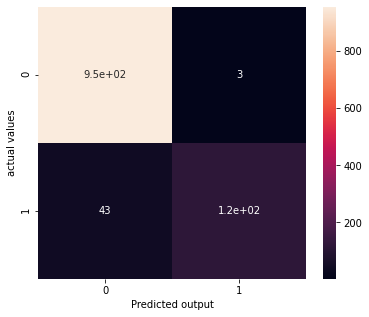

In [21]:
plt.figure(figsize=(6,5))
sn.heatmap(confusion_matrix, annot= True)
plt.xlabel("Predicted output")
plt.ylabel("actual values")
plt.show()

In [22]:
model.score(x_test,y_test)

0.9587443946188341

In [ ]:
# Our model is 96% accurate 